La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido
a enfermedades cardíacas, producidas en su gran mayoría por enfermedades
cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede
ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto
riesgo y reducir las complicaciones.


● Sex: M - F

● Age: edad

● Education: codificada, considerando que un valor más alto corresponde a un mayor nivel educativo.

● currentSmoker: si el paciente es o no fumador actual

● cigsPerDay: el número de cigarrillos que la persona fumaba en promedio en un día.

● BPMeds: si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)

● prevalenStroke: si el paciente había tenido un accidente cerebrovascular previamente
(0: No, 1: Sí)

● prevalentHyp:: si el paciente era hipertenso o no (0: No, 1: Sí)

● diabetes: si el paciente tenía diabetes o no (0: No, 1: Sí)

● totChol: nivel de colesterol total

● sysBP: presión arterial sistólica

● diaBP_BMI: presión arterial diastólica

● BMI: Índice de masa corporal

● heartRate: : ritmo cardíaco

● glucose: nivel de glucosa

● TenYearCHD: se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)

# 1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos

In [1]:
#Importamos librerias necesarias y cargamos la base de datos

import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

data = pd.read_csv('/content/cardio[1].csv', delimiter=',')
print('Primeras filas de la base de datos')
data.head()

Primeras filas de la base de datos


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [3]:
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [4]:
# Eliminar filas con datos nulos
data_sin_nulos = data.dropna()
# Verificar la eliminación de datos nulos
print("\nDespués de eliminar los datos nulos:")
print(data_sin_nulos.info())


Después de eliminar los datos nulos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5

In [5]:
data_sin_nulos.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,49.557440,1.979759,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,8.561133,1.022657,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# 2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?


In [6]:
#Escogeremos las varibles "Age" (Edad), "sysBP" (Presión arterial sistólica) y "totChol" (Colesterol total)
variables_seleccionadas = data_sin_nulos[['age', 'sysBP', 'totChol']]
# Calcular estadísticos descriptivos
print(variables_seleccionadas.describe())


               age        sysBP      totChol
count  3656.000000  3656.000000  3656.000000
mean     49.557440   132.368025   236.873085
std       8.561133    22.092444    44.096223
min      32.000000    83.500000   113.000000
25%      42.000000   117.000000   206.000000
50%      49.000000   128.000000   234.000000
75%      56.000000   144.000000   263.250000
max      70.000000   295.000000   600.000000


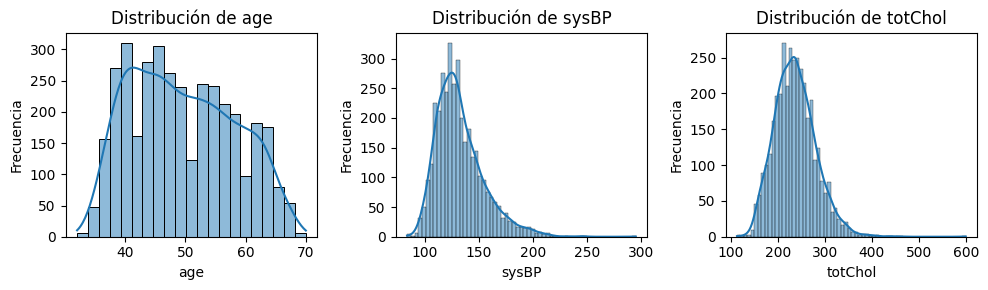

In [25]:
# Crear histogramas para visualizar la distribución de los datos
plt.figure(figsize=(10, 3))
for i, var in enumerate(variables_seleccionadas, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data_sin_nulos[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [8]:
# Calcular la dispersión para cada variable
varianza = variables_seleccionadas.var()
print(varianza)

age          73.293006
sysBP       488.076080
totChol    1944.476912
dtype: float64


Respuesta: Esto confirma que la variable "totChol" tiene la mayor dispersión, ya que tiene la varianza más alta (1944.48), seguida por "sysBP" y luego "Age". La varianza es una medida de dispersión que cuantifica la variabilidad de los datos respecto a la media. Una varianza mayor indica una dispersión más amplia de los datos alrededor de la media.

# 3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"

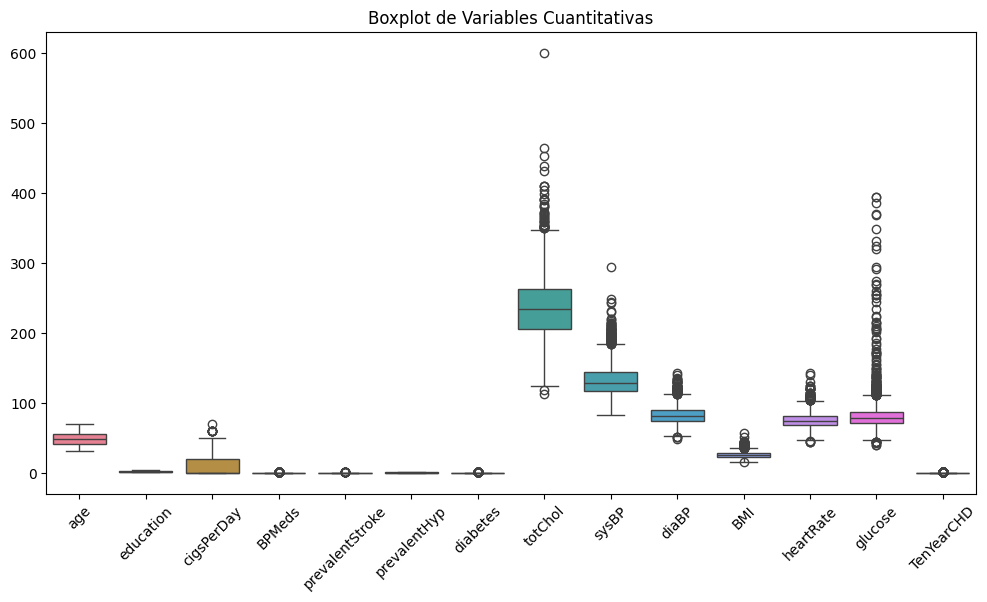

In [9]:
#Primero graficamos para observar los datos atipicos en el dataset
plt.figure(figsize=(12, 6))

# Graficar boxplots para cada variable cuantitativa
sns.boxplot(data=data_sin_nulos)
plt.title('Boxplot de Variables Cuantitativas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor visualización
plt.show()

In [10]:
# Calcular el rango intercuartílico (IQR) para cada variable
Q1 = data_sin_nulos.quantile(0.25) #percentil 25%
Q3 = data_sin_nulos.quantile(0.75) #percentil 75%
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR #limite inferior
upper_bound = Q3 + 1.5 * IQR  #limite superior

# Identificar filas que contienen atipicos en al menos una de las variables
atipicos = ((data_sin_nulos < lower_bound) | (data_sin_nulos > upper_bound)).any(axis=1)

# Eliminar filas con outliers
df_clean = data_sin_nulos[~atipicos]

# Mostrar el tamaño del dataset limpio
print("Tamaño del dataset limpio después de eliminar atipicos:", df_clean.shape)


Tamaño del dataset limpio después de eliminar atipicos: (2695, 16)


<ipython-input-10-01289fa881af>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data_sin_nulos.quantile(0.25) #percentil 25%
<ipython-input-10-01289fa881af>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data_sin_nulos.quantile(0.75) #percentil 75%
<ipython-input-10-01289fa881af>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  atipicos = ((data_sin_nulos < lower_bound) | (data_sin_nulos > upper_bound)).any(axis=1)


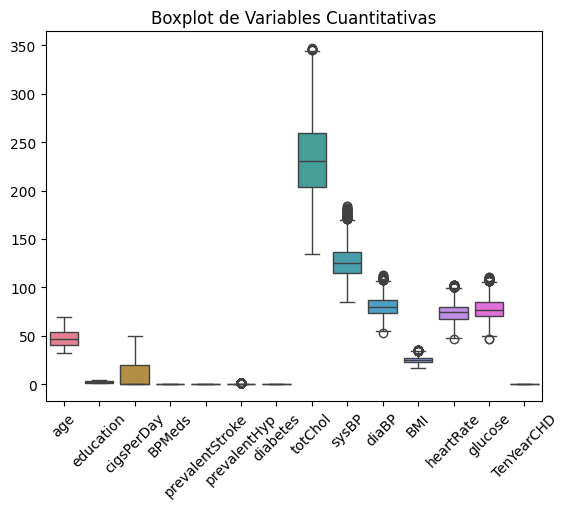

In [11]:

# Graficar boxplots para cada variable cuantitativa para observar resultados sin atipicos
sns.boxplot(data= df_clean)
plt.title('Boxplot de Variables Cuantitativas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor visualización
plt.show()

# 4. ¿Qué variables cuantitativas presentan mayor correlación? Explica

<ipython-input-12-3870e5321576>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

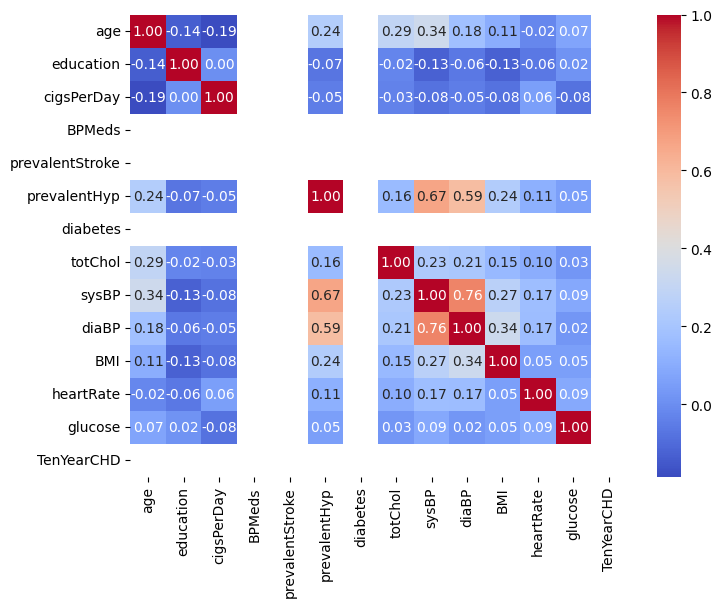

In [12]:

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")

RESPUESTA:

Una correlación de 0.76 entre "sysBP" (Presión arterial sistólica) y "diaBP" (Presión arterial diastólica) indica una correlación positiva bastante fuerte. Esto significa que a medida que la presión arterial sistólica aumenta, es probable que la presión arterial diastólica también aumente, y viceversa. Esta correlación es comprensible ya que ambos son componentes de la presión arterial y a menudo se ven afectados de manera similar por los mismos factores.

Por otro lado, una correlación de 0.67 entre "sysBP" (Presión arterial sistólica) y "prevalentHyp" (Hipertensión prevalente) también indica una correlación positiva significativa, aunque un poco más moderada que la anterior. Esto sugiere que hay una asociación entre la presión arterial sistólica y la prevalencia de hipertensión en los datos. Es lógico esperar que aquellos con una presión arterial sistólica más alta tengan una mayor probabilidad de ser diagnosticados con hipertensión.

# 5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?


In [13]:
# Calcular el límite superior del mayor cuartil de BMI
upper_quartile_bmi = df_clean['BMI'].quantile(0.75)

# Filtrar el conjunto de datos para pacientes con BMI en el mayor cuartil
patients_in_upper_quartile_bmi = df_clean[df_clean['BMI'] > upper_quartile_bmi]

# Calcular la probabilidad de que un paciente al azar sea hombre dado que está en el mayor cuartil de BMI
total_patients = len(df_clean)
male_patients_in_upper_bmi = patients_in_upper_quartile_bmi[patients_in_upper_quartile_bmi['sex'] == 'M']
total_male_patients_in_upper_bmi = len(male_patients_in_upper_bmi)

probability_male_given_upper_bmi = total_male_patients_in_upper_bmi / total_patients

print("Probabilidad de que un paciente al azar sea hombre, dado que pertenece al mayor cuartil de BMI:", probability_male_given_upper_bmi)


Probabilidad de que un paciente al azar sea hombre, dado que pertenece al mayor cuartil de BMI: 0.13098330241187384


# 6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.


In [26]:
#Para responder esta pregunta realizaremos un T-Test para verificar la hipotesis nula (el ritmo cardíaco promedio de la población es igual a 75).
media_hipotetica = 75
ritmo_cardiaco = df_clean['heartRate']

#Realizando prueba hipotetica para determinar si
t_stat, p_value = st.ttest_1samp(ritmo_cardiaco, media_hipotetica)
print(f't_stat: {t_stat}')
print(f'p_value: {p_value}\n')

#Considerando un valor de alpha= 0.05
alpha= 0.05

if p_value < alpha:
    print("El ritmo cardíaco promedio es significativamente diferente de 75.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis de que el ritmo cardíaco promedio es igual a 75.")

t_stat: -1.889559975914742
p_value: 0.058924116907984034

No hay suficiente evidencia para rechazar la hipótesis de que el ritmo cardíaco promedio es igual a 75.


No es necesariamente razonable afirmar que el ritmo cardíaco promedio de una persona cualquiera es 75, simplemente basándonos en el valor promedio del ritmo cardíaco en el conjunto de datos proporcionado. Hay varias razones por las cuales esta afirmación puede no ser válida:

Variabilidad individual: El ritmo cardíaco puede variar significativamente entre individuos debido a una variedad de factores, como la edad, el nivel de actividad física, la salud general y las condiciones médicas subyacentes. Por lo tanto, el ritmo cardíaco promedio puede ser diferente para diferentes personas.

Sesgos en el conjunto de datos: El conjunto de datos proporcionado puede no representar adecuadamente a la población general. Puede haber sesgos en la muestra, como una sobrerrepresentación de ciertos grupos demográficos o personas con condiciones médicas específicas, lo que podría influir en el valor promedio del ritmo cardíaco en el conjunto de datos.

Limitaciones del conjunto de datos: El conjunto de datos puede no incluir información sobre todos los factores que afectan el ritmo cardíaco de una persona. Por lo tanto, el valor promedio del ritmo cardíaco en el conjunto de datos puede no ser una representación completa de la diversidad de ritmos cardíacos en la población general.

En resumen, mientras que el valor promedio del ritmo cardíaco en el conjunto de datos proporcionado puede ser útil para comprender la muestra específica de pacientes incluidos en el estudio, no proporciona suficiente evidencia para afirmar que el ritmo cardíaco promedio de una persona cualquiera es 75. Es importante considerar la variabilidad individual y las limitaciones del conjunto de datos al hacer tales afirmaciones.

# 7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.

In [14]:
# Filtrar el conjunto de datos para incluir solo pacientes fumadores
smoking_patients = df_clean[df_clean['currentSmoker'] == 'Yes']

# Calcular el promedio de cigarrillos consumidos por día para hombres y mujeres
average_cigs_per_day_male = smoking_patients[smoking_patients['sex'] == 'M']['cigsPerDay'].mean()
average_cigs_per_day_female = smoking_patients[smoking_patients['sex'] == 'F']['cigsPerDay'].mean()

# Comparar los promedios
print("Promedio de cigarrillos consumidos por día para hombres:", average_cigs_per_day_male)
print("Promedio de cigarrillos consumidos por día para mujeres:", average_cigs_per_day_female)


Promedio de cigarrillos consumidos por día para hombres: 21.71937321937322
Promedio de cigarrillos consumidos por día para mujeres: 13.753623188405797


Con esta información, podemos observar que el promedio de cigarrillos consumidos por día es más alto para hombres (aproximadamente 21.72 cigarrillos) en comparación con mujeres (aproximadamente 13.75 cigarrillos). Esta diferencia sugiere que el género podría influir en la cantidad de cigarrillos consumidos por día dentro del grupo de pacientes fumadores.

# 8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Seleccionar las variables independientes
X = df_clean[['age', 'sysBP', 'diaBP', 'prevalentHyp', 'currentSmoker', 'glucose']]

# Seleccionar la variable dependiente (BMI)
y = df_clean['BMI']

# Convertir variables cualitativas en variables dummy
X = pd.get_dummies(X, columns=['prevalentHyp', 'currentSmoker'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores de BMI en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)
X['currentSmoker'] = df_clean['currentSmoker']
X_encoded = pd.get_dummies(X, columns=['age'], prefix='Age', prefix_sep='-')
X_encoded = pd.get_dummies(X_encoded, columns=['currentSmoker'], prefix='Smoker', prefix_sep='-')
X_encoded = sm.add_constant(X_encoded)
#Crear el modelo de regresión lineal
model = sm.OLS(y, X_encoded).fit()
results = model.summary()
print(results)

Error cuadrático medio (MSE): 10.466449630289343
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     10.71
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.63e-63
Time:                        01:51:46   Log-Likelihood:                -6932.3
No. Observations:                2695   AIC:                         1.395e+04
Df Residuals:                    2652   BIC:                         1.420e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------


El error cuadrático medio (MSE) calculado para el modelo de regresión lineal es aproximadamente 10.47. Este valor representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales de BMI en el conjunto de prueba.

Un MSE de 10.47 indica que, en promedio, las predicciones del modelo están desviadas en aproximadamente 10.47 unidades de BMI respecto a los valores reales en el conjunto de prueba. Sin embargo, la interpretación exacta del MSE depende del contexto específico del problema y de la escala de la variable de respuesta (en este caso, el índice de masa corporal).

Para evaluar si este valor de MSE es aceptable o no, se puede comparar con el rango de valores de BMI en el conjunto de datos y con la magnitud de otras variables relacionadas con la salud y el bienestar. También se puede comparar con el MSE obtenido utilizando otros modelos o técnicas de regresión para determinar si este modelo proporciona un ajuste adecuado a los datos.

# 9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.


In [28]:
print(df_clean.head())

  sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   M   39        4.0            No         0.0     0.0                0   
1   F   46        2.0            No         0.0     0.0                0   
2   M   48        1.0           Yes        20.0     0.0                0   
4   F   46        3.0           Yes        23.0     0.0                0   
5   F   43        2.0            No         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   

   TenYearCHD  
0           0  
1           0  
2           0  
4   

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Seleccionar las variables predictoras (características) y la variable objetivo
X = df_clean.drop(columns=['TenYearCHD'])
y = df_clean['TenYearCHD']

# Verificar el balanceo de los datos para la variable objetivo
print("Balance de clases en la variable objetivo:")
print(y.value_counts())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nExactitud del modelo:", accuracy)

# Imprimir el reporte de clasificación y la matriz de confusión
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Balance de clases en la variable objetivo:
0    2695
Name: TenYearCHD, dtype: int64


ValueError: could not convert string to float: 'F'